# Домашнее задание 

В этом задании мы попрактикуемся в методах снижения размерности и кластеризации данных. 

## Задание 1. Кластеризация типов движений (5 баллов)

В этой части задания мы будем работать с набором данных Samsung Human Activity Recognition. Скачайте данные по ссылке https://yadi.sk/d/_WFxgSIuBF06Rg. Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков.

Также есть методичка/овервью от sklearn:
[Методичка](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

Для удобства все данные для дз сохранил в гугл диске

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
root_path = 'gdrive/MyDrive/HSE_ML_HW4/'

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt


plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

%matplotlib inline
%config InlineBackend.figure_format="retina"

RANDOM_STATE = 42

### Задание 1.0 (0.1 балл)
Прочитайте данные из файлов и объедните тестовую и обучающие выборки.

В файлах ```..._labels``` лежат настоящие классы. Их также объедините, но в отдельную переменную (например ```y```). Данный вектор для кластеризации нам не нужен, но мы будем смотреть по нему метрики.

In [5]:
X_train = np.loadtxt(root_path + 'samsung_train.txt')
y_train = np.loadtxt(root_path + 'samsung_train_labels.txt').astype(int)

X_test = np.loadtxt(root_path + 'samsung_test.txt')
y_test = np.loadtxt(root_path + 'samsung_test_labels.txt').astype(int)

In [6]:
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

In [171]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

### Задание 1.1 (0.5 баллов)

Отмасштабируйте выборку с помощью ```StandardScaler```.

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Задание 1.2 (0.6 баллов)

Понизьте размерность с помощью ```PCA```, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии отмасштабированных данных. ```random_state``` используйте из объявленной в самом начале переменной ```RANDOM_STATE``` (42).

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [8]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=0.90, svd_solver='full', random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled) 

In [174]:
print("Components =", pca.n_components_)
print("Total explained variance =", round(pca.explained_variance_ratio_.sum(),5))

Components = 65
Total explained variance = 0.90048


### Задание 1.3 (0.3 баллов)

Визуализируйте данные в проекции на первые две главные компоненты. Используйте ```cmap="virdis"``` или любой другой, с которым будет красиво :)

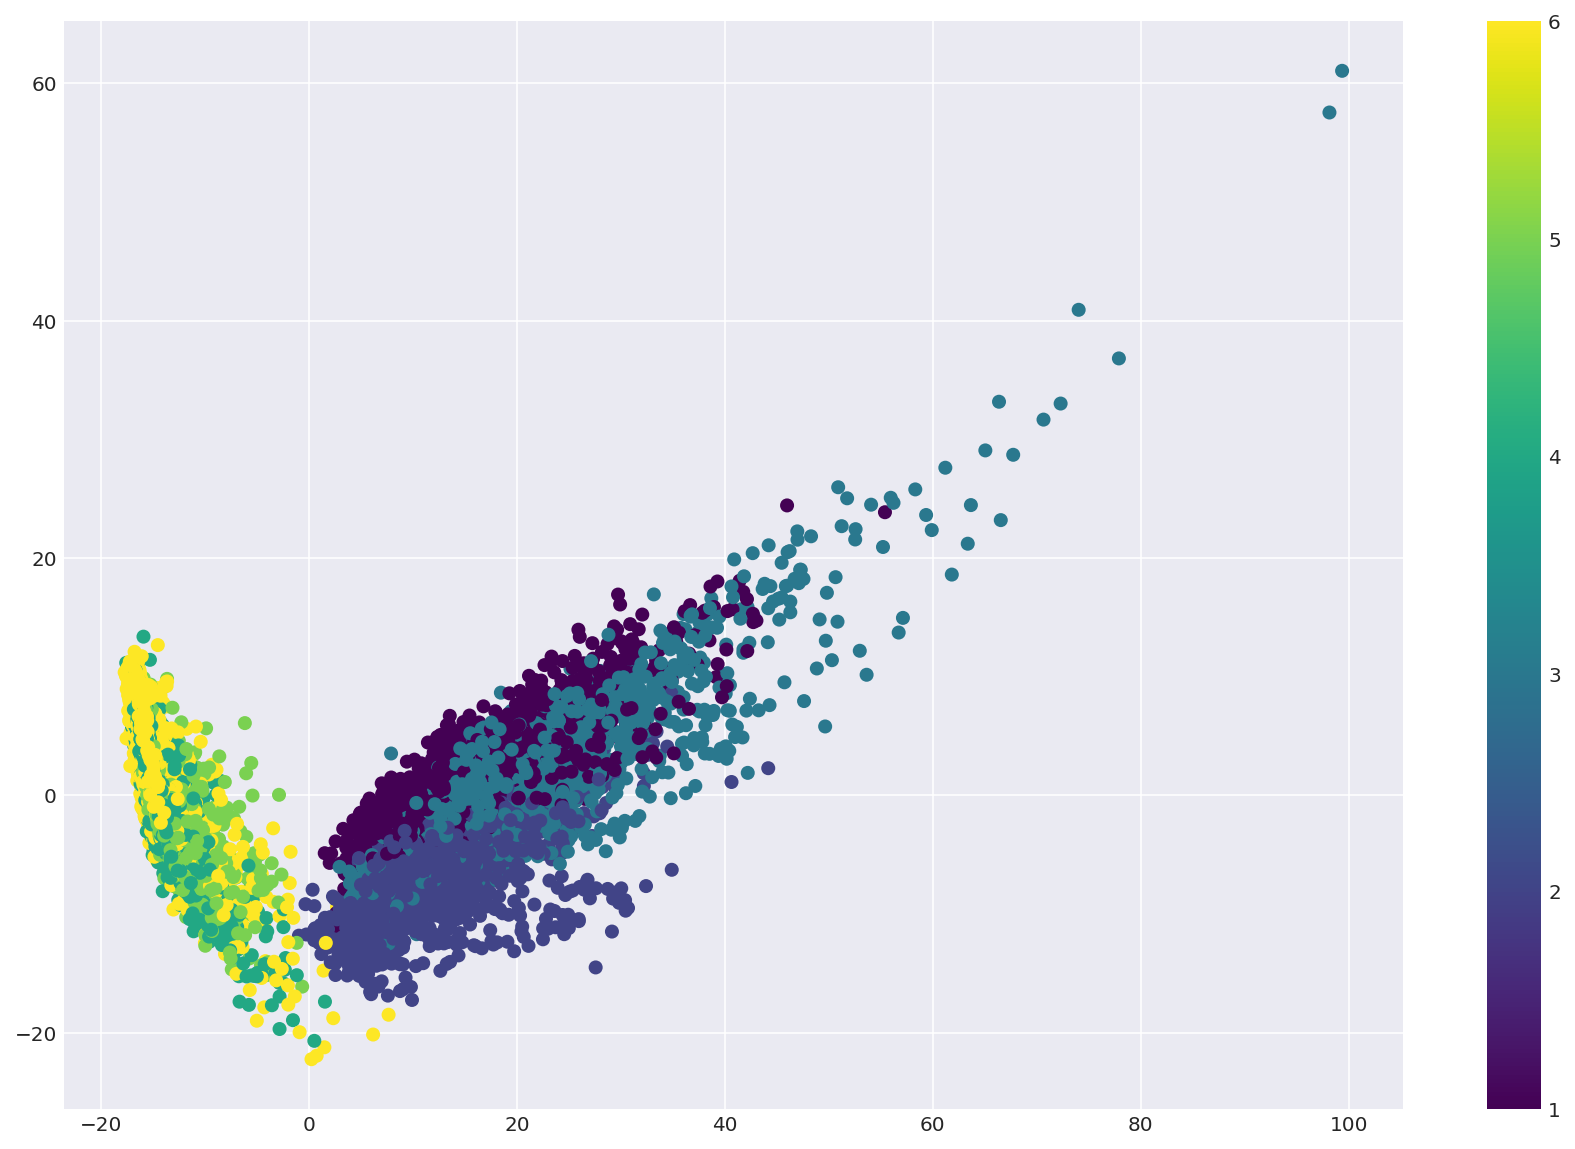

In [175]:
plt.figure(figsize=(15,10))
plt.scatter(X_pca[...,0], X_pca[...,1], c=y, cmap='viridis');
plt.colorbar();

Визуально отделенны друг от друга 2 кластера: (ходьба, подъем вверх по лестнице, спуск по лестнице) и (сидение, стояние, лежание).

### Задание 1.4 (0.4 балла)

Сделайте кластеризацию данных методом ```KMeans```, обучив модель на данных со сниженной за счет ```PCA```
размерностью. В данном случае нужно искать 6 кластеров (изначально у нас 6 классов). Засеките время обучения и время инференса.

Параметры:

```n_clusters = 6``` (число уникальных меток целевого класса = 6)

```n_init = 100```

```random_state = RANDOM_STATE``` (для воспроизводимости результата, не забывайте указывать его и дальше!)

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [176]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)

%time kmeans.fit(X_pca)

%time kmeans_pred = kmeans.predict(X_pca)

CPU times: user 24 s, sys: 7.79 s, total: 31.8 s
Wall time: 17.9 s
CPU times: user 7.76 ms, sys: 3.96 ms, total: 11.7 ms
Wall time: 5.74 ms


### Задание 1.5 (0.2 балла)

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

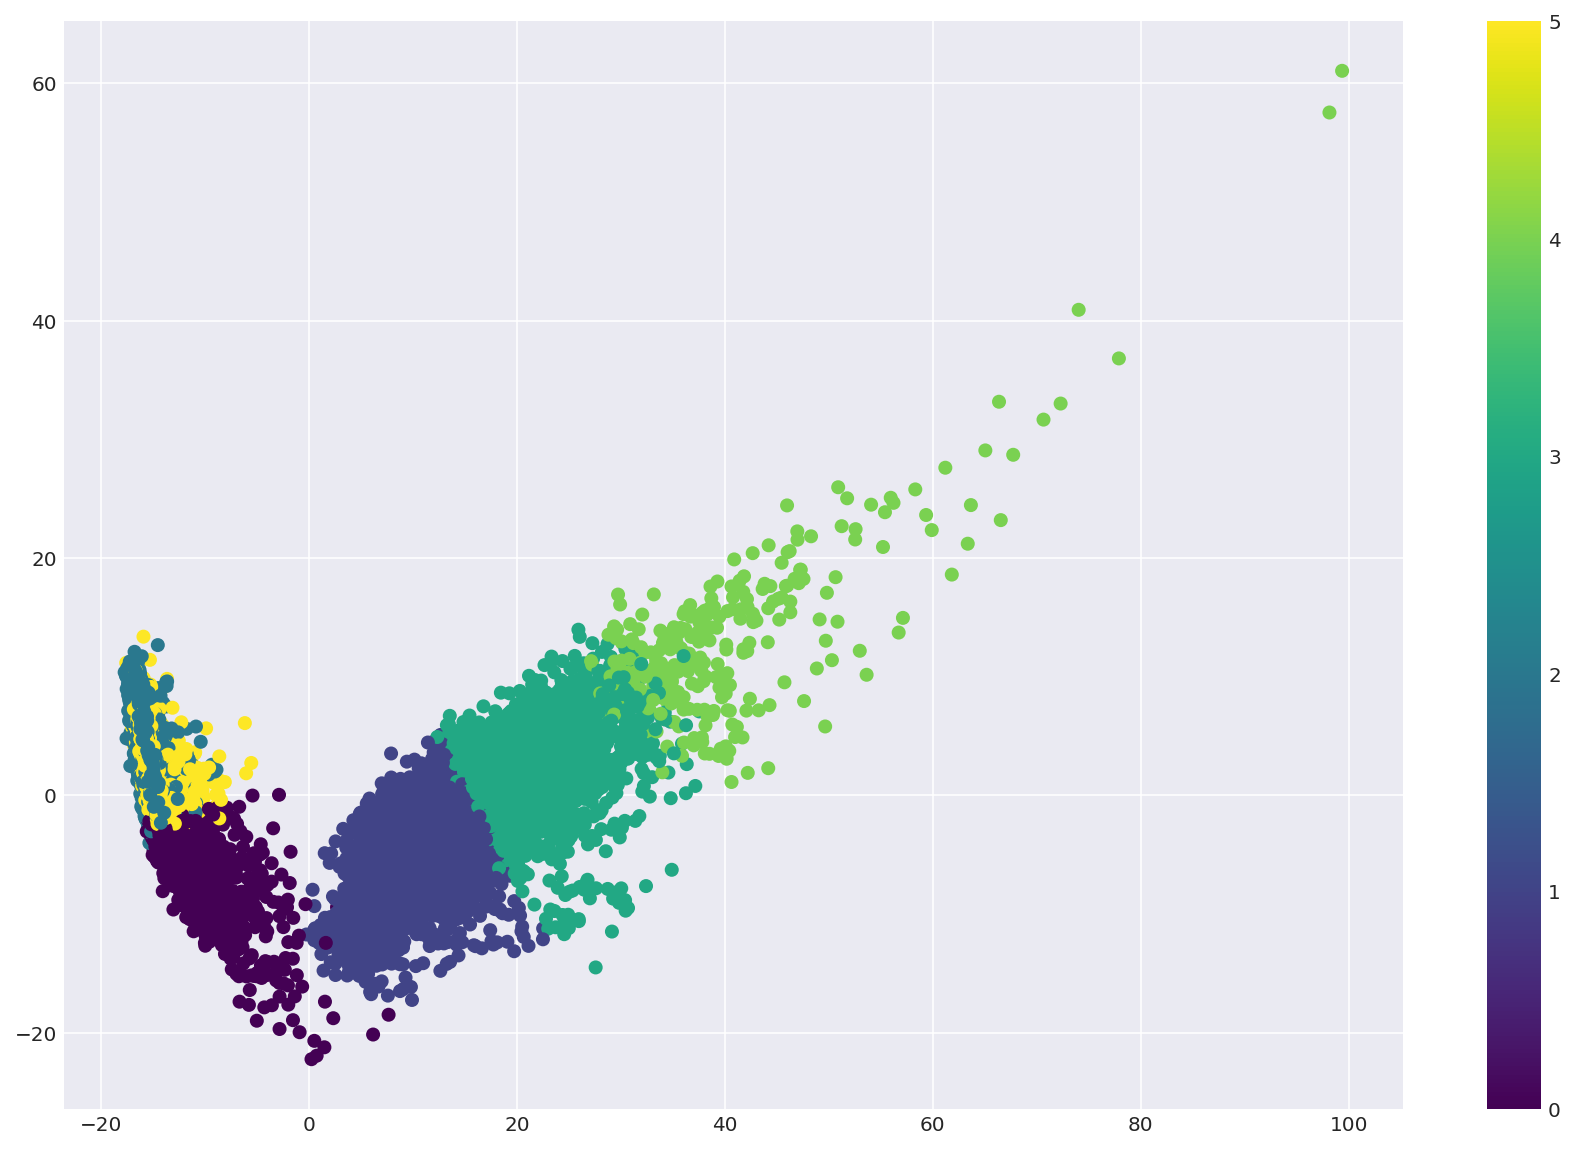

In [177]:
plt.figure(figsize=(15,10))
plt.scatter(X_pca[...,0], X_pca[...,1], c=kmeans_pred, cmap='viridis');
plt.colorbar();

In [179]:
cluster_tab = pd.crosstab(y, kmeans_pred, margins=True)

cluster_tab.index = ['ходьба', 'подъем вверх по лестнице', 
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'итого']

cluster_tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['итого']

cluster_tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,итого
ходьба,0,902,0,742,78,0,1722
подъем вверх по лестнице,2,1240,0,297,5,0,1544
спуск по лестнице,0,320,0,890,196,0,1406
сидение,454,1,88,0,0,1234,1777
стояние,571,0,0,0,0,1335,1906
лежание,331,5,1556,0,0,52,1944
итого,1358,2468,1644,1929,279,2621,10299


Видим, что каждому классу соответствуют несколько кластеров. 

### Задание 1.6 (0.3 баллов)

Выберите какие-то метрики (минимум две) из известных вам или из методички (ссылка в начале дз, пункт 2.3.10), объясните ваш выбор.

Выведите на экран значения метрик качества кластеризации и используйте их далее.

Я расмотрю такие метрики как однородность, полнота и V-мера. С помощью них можно интуитивно интерпретировать, а также использовать для сравнения алгоритмов кластеризации.

In [180]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, kmeans_pred))
print("Completeness: %0.3f" % metrics.completeness_score(y, kmeans_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(y, kmeans_pred))

Homogeneity: 0.541
Completeness: 0.581
V-measure: 0.560


### Задание 1.7 (0.8 баллов)
Теперь попробуем сделать кластеризацию с помощью ```AgglomerativeClustering```.

Вновь визуализируйте данные с раскраской по полученным меткам и выведите метрики. Засеките время обучения и время инференса. Сравните с ```KMeans```.

Ответьте на следующие вопросы:
* Стало ли лучше?
* Почему?

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

У AgglomerativeClustering нет отдельного предикта, поэтому засеку fit  и fit_predict

In [21]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=6)

%time ag.fit(X_pca)

%time ag_pred = ag.fit_predict(X_pca)

CPU times: user 8.49 s, sys: 902 ms, total: 9.39 s
Wall time: 9.44 s
CPU times: user 8.25 s, sys: 370 ms, total: 8.62 s
Wall time: 9.08 s


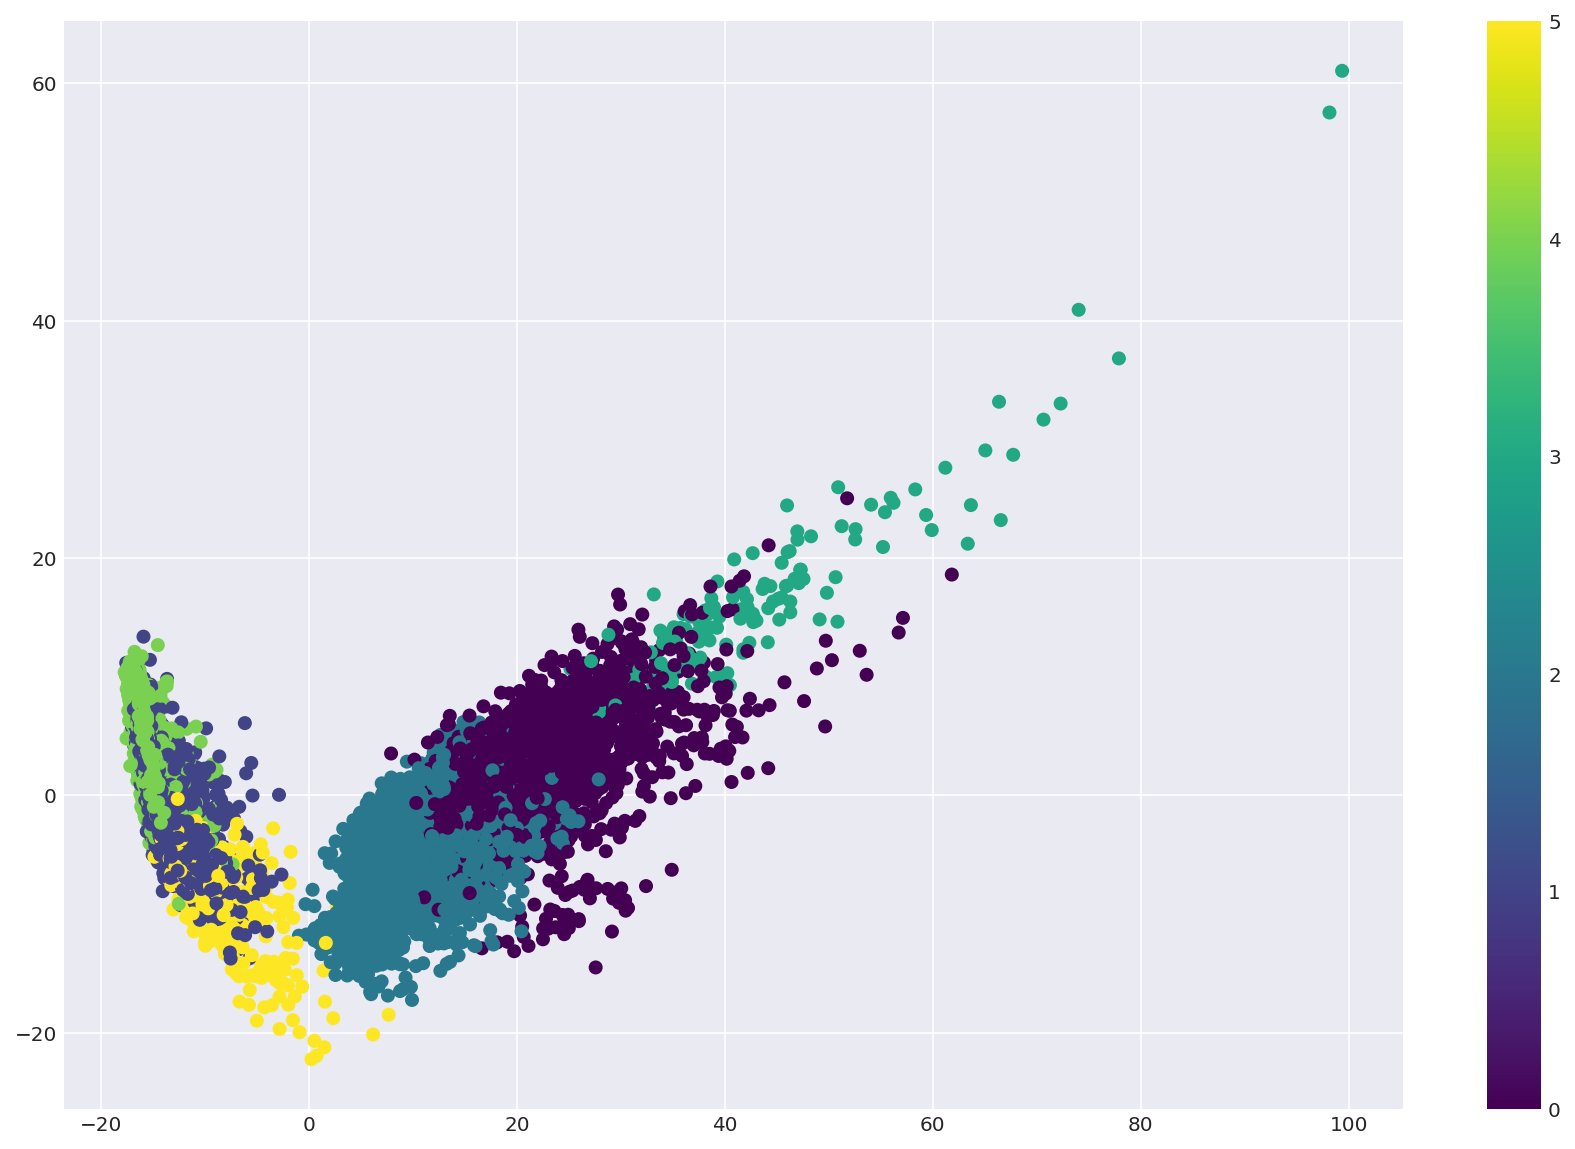

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(X_pca[...,0], X_pca[...,1], c=ag_pred, cmap='viridis');
plt.colorbar();

In [185]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, ag_pred))
print("Completeness: %0.3f" % metrics.completeness_score(y, ag_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(y, ag_pred))

Homogeneity: 0.578
Completeness: 0.673
V-measure: 0.622


По выбранным метрикам стало получше. По kmeans мы увидели что каждому классу может соответствовать несколько кластеров. А агломеративная кластеризация как раз находит точки ближе всего друг к другу, и последовательно группирует их вместе.

### Задание 1.8 (0.8 баллов)

Попробуйте применить другие методы кластеризации из sklearn.  Засеките время обучения и время инференса. Также вычислите метрики качества, визуализируйте результаты, после чего сделайте вывод о том, какой метод сработал лучше.

In [13]:
from sklearn.cluster import MiniBatchKMeans

mini_batch_kmeans = MiniBatchKMeans(n_clusters=6,
                                    n_init=100,
                                    random_state=RANDOM_STATE)

%time mini_batch_kmeans.fit(X_pca)

%time mini_batch_kmeans_pred = mini_batch_kmeans.fit_predict(X_pca)

CPU times: user 2.69 s, sys: 1.3 s, total: 3.99 s
Wall time: 2.15 s
CPU times: user 3.72 s, sys: 1.58 s, total: 5.3 s
Wall time: 3.41 s


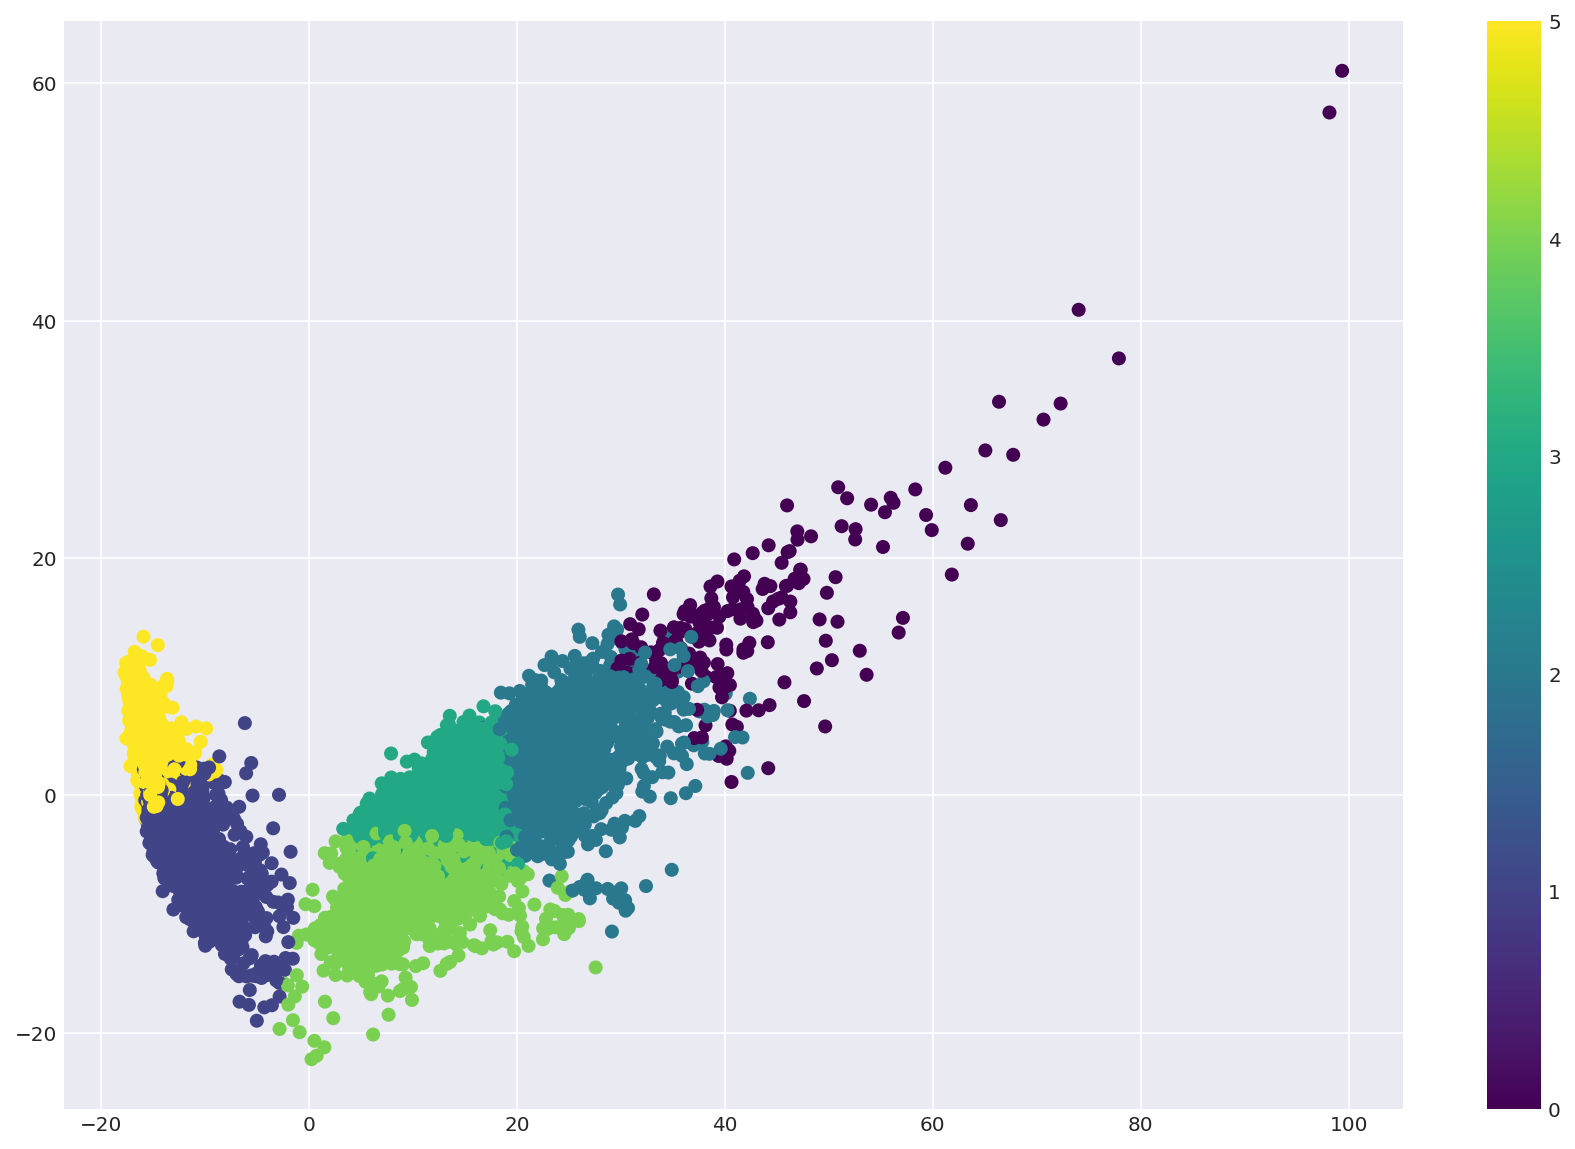

In [14]:
plt.figure(figsize=(15,10))
plt.scatter(X_pca[...,0], X_pca[...,1], c=mini_batch_kmeans_pred, cmap='viridis');
plt.colorbar();

In [17]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, mini_batch_kmeans_pred))
print("Completeness: %0.3f" % metrics.completeness_score(y, mini_batch_kmeans_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(y, mini_batch_kmeans_pred))

Homogeneity: 0.457
Completeness: 0.504
V-measure: 0.479


MiniBatchKMeans справился хуже

In [18]:
from sklearn.cluster import BisectingKMeans

bis_kmeans = BisectingKMeans(n_clusters=6,
                             n_init=100,
                             random_state=RANDOM_STATE)

%time bis_kmeans.fit(X_pca)

%time bis_kmeans_pred = bis_kmeans.predict(X_pca)

CPU times: user 13.1 s, sys: 70.9 ms, total: 13.2 s
Wall time: 8.32 s
CPU times: user 25.5 ms, sys: 0 ns, total: 25.5 ms
Wall time: 12.7 ms


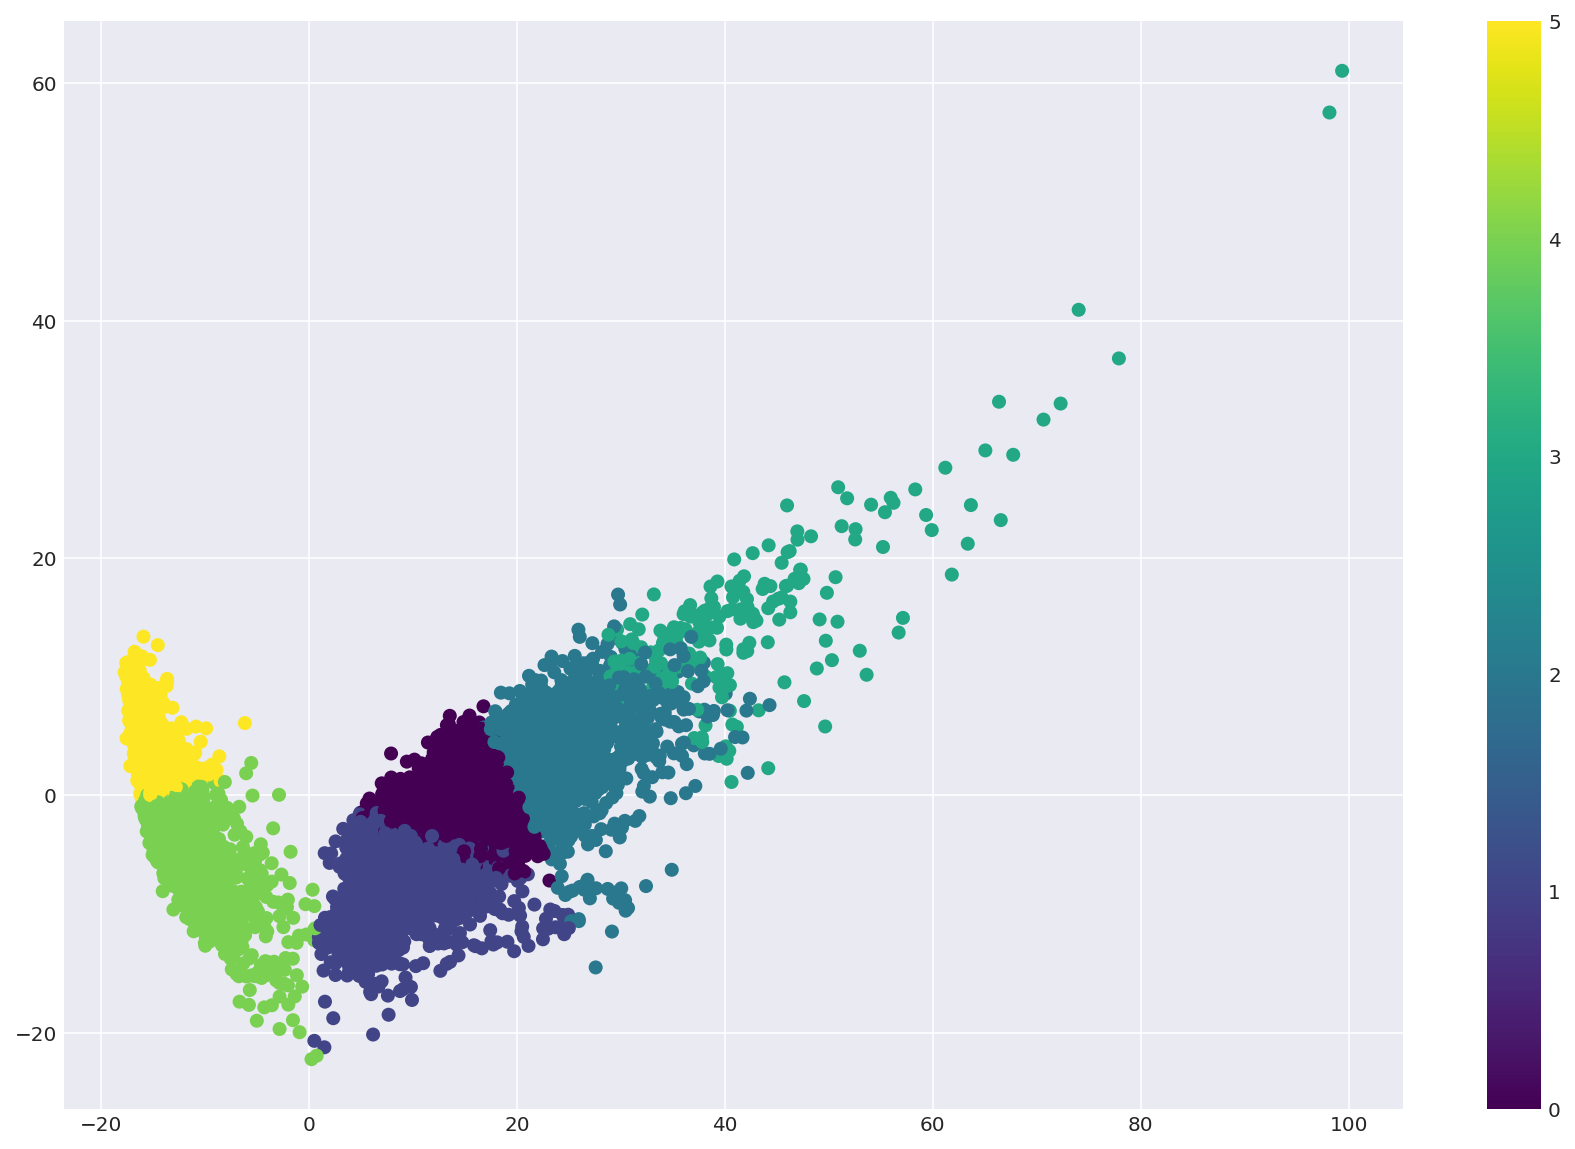

In [19]:
plt.figure(figsize=(15,10))
plt.scatter(X_pca[...,0], X_pca[...,1], c=bis_kmeans_pred, cmap='viridis');
plt.colorbar();

In [20]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, bis_kmeans_pred))
print("Completeness: %0.3f" % metrics.completeness_score(y, bis_kmeans_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(y, bis_kmeans_pred))

Homogeneity: 0.437
Completeness: 0.483
V-measure: 0.459


BisectingKMeans справился хуже всего

По выбранным метрикам лучше всего отработал AgglomerativeClustering

### Задание 1.9 (1 балл)
Для самой успешной из полученных кластеризаций попробуйте дать интерпретацию кластеров. Опишите характеристики объектов, попавших в каждый кластер. Для этого можете ответить на следующие вопросы:

* Похожи ли объекты внутри каждого кластера на определенный тип активности человека?
* В каких кластерах смешано несколько типов активности? С чем, на ваш взгляд, это может быть связано?
* Качественная ли получилась кластеризация? На основании чего вы можете сделать такой вывод?

In [23]:
cluster_tab = pd.crosstab(y, ag_pred, margins=True)

cluster_tab.index = ['ходьба', 'подъем вверх по лестнице', 
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'итого']

cluster_tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['итого']

cluster_tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,итого
ходьба,800,0,896,26,0,0,1722
подъем вверх по лестнице,337,0,1207,0,0,0,1544
спуск по лестнице,1144,0,138,124,0,0,1406
сидение,0,1559,0,0,71,147,1777
стояние,0,1832,0,0,0,74,1906
лежание,0,74,0,0,1604,266,1944
итого,2281,3465,2241,150,1675,487,10299



1. Внутри каждого кластера есть объекты которые похожи на определенный тип активности человека и которые не похожи. Так например, ходьба похожа на спуск по лестнице (признак движение), но ходьба не похожа на сидение.
2. Видим, во всех кластерах смешано несколько типов активности. Видимо находится близкие друг к другу краевые точки, которые неправильно группируются.
3. Кластеризация получилось некачественной, v-мера не близка к 1.

## Задание 2. Разделение изображения на семантические компоненты (5 баллов)

![RedPanda](http://imgur.com/6Aa52Lm.png)

Алгоритмы кластеризации могут применяться в самых разных задачах. Например, в анализе изображений есть задача разделения изображения на семантические компоненты, которую можно решать в том числе с помощью алгоритмов кластеризации. 

Проверим их на ```duck.jpg``` и ```owls.jpg```

### Задание 2.0 (0.1 балл)

Откройте изображения, после чего визуализируйте их с помощью ```plt.imshow()```

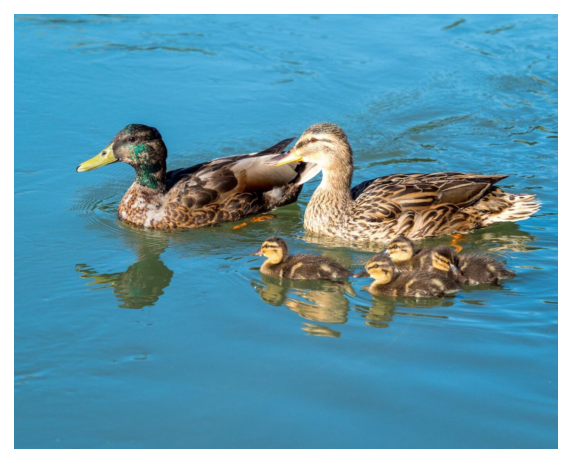

In [ ]:
from PIL import Image

im_duck = Image.open(root_path + 'duck.jpg')
plt.axis('off')
plt.imshow(im_duck);

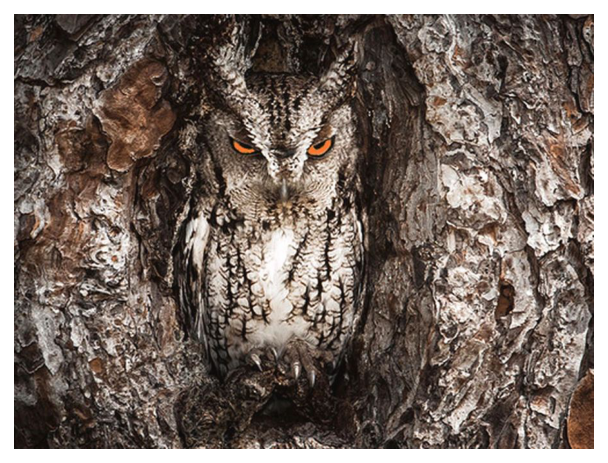

In [ ]:
im_owls = Image.open(root_path + 'owls.jpg')
plt.axis('off')
plt.imshow(im_owls);

### Задание 2.1 (1.5 балла)
Для каждого изображения, используя кластеризацию ```KMeans```, выделите компоненты, охарактеризовав каждый пиксель следующим образом: $\psi_i = [\lambda x_i, \lambda y_i, r_i, g_i, b_i]$, где 
$x_i$ и $y_i$ — координаты пикселя, $r_i, g_i, b_i$ — его цвет, $\lambda$ — параметр, выражающий важность пространственной связности перед цветовой похожестью.

Примените полученную функцию, взяв следующие $\lambda$: 0.3 и 1.5 для ```duck.jpg``` и ```owls.jpg``` (или другие, но тогда с вас красивые результаты :) )

Число кластеров подберите разумным образом на свой вкус (в качестве нулевого приближения можно взять 3)

In [ ]:
pixel_values = list(im_owls.getdata())
width, height = im_owls.size

In [ ]:
im_owls.size

(900, 675)

In [ ]:
from skimage.transform import rescale

rescale(im_owls, 0.1)

AttributeError: ignored

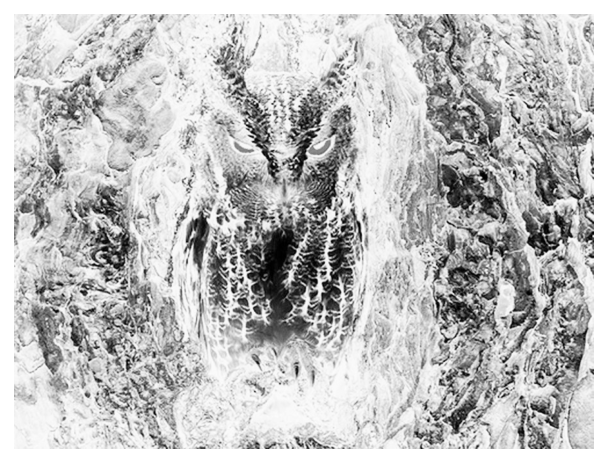

In [ ]:
from skimage.color import rgb2gray
img_gray = rgb2gray(im_owls)
plt.axis('off')
plt.imshow(img_gray);

In [ ]:
r, g, b = im_owls.getpixel((1, 2))

In [ ]:
r

38

In [ ]:
def find_components(image, lmbd, n_clusters):
  w = []
  width, height = im_owls.size
  for i in range(width):
    for j in range(height):
      r, g, b = im_owls.getpixel((i, j))
      w.append([lmbd * i / width, lmbd * j / height, r / 255, g / 255, b / 255])

  kmeans = KMeans(n_clusters=n_clusters, n_init=3, random_state=RANDOM_STATE)
  res = kmeans.fit_predict(w)

  return res

In [ ]:
res = find_components(im_owls, 0.3, 6)

In [ ]:
np.unique(res)

array([0, 1, 2, 3, 4, 5], dtype=int32)

### Задание 2.2 (1.5 балла)
Попробуйте выделить сегменты при помощи [спектральной кластеризации](http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering). Обратите внимание на [пример в sklearn](http://scikit-learn.org/0.16/auto_examples/cluster/plot_lena_segmentation.html). Для ускорения работы алгоритма рекомендуется привести изображение к серому цвету. При необходимости можно сжать изображения в 2 раза.

Подсказка: ```skimage``` с его ```color``` и ```transform``` в этом помогут :)

Или же воспользуйтесь аналогичными средствами ```PIL``` или ```cv2``` 

In [ ]:
def spectral_segmentation(image, n_clusters, beta, eps):
    #your code here

### Задание 2.3 (0.9 баллов)
Визуализируйте результаты сегментации (аналогично рисунку в начале задания 2) для обоих методов.

In [ ]:
#your code here

### Задание 2.4 (1 балл)
Найдите интересную картинку милого животного и примените алгоритмы и к ней. Поэкспериментируйте с параметрами алгоритмов. Картинку нужно будет загрузить вместе с работой. Слишком большие лучше не брать - считаться будет долго. Не забудьте визуализировать!

Сравните два подхода и сегментации, к которым они приводят.
Для всех ли изображений в результате сегментации хорошо видны контуры объектов?

In [ ]:
#your code here

# your text here

# Акция
Повеселите проверяющего и вставьте смешной мем. Вдруг повысят балл! Или разместите ваше сообщение о продаже гаража здесь.

[Методичка по мемам](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# your meme here